In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv' , header = 1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [33]:
## Missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [34]:
dataset.loc[:122,"Region"] = 0
dataset.loc[122:,"Region"] = 1
df = dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [36]:
df['Region'] = df['Region'].astype(int)

In [37]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [38]:
# Dropping null columns
df = df.dropna().reset_index(drop=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [40]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [41]:
df = df.drop(122).reset_index(drop=True)

In [42]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [43]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [44]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [45]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


In [46]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [47]:
objects = [feature for feature in df.columns if df[feature].dtypes == 'O']

for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## Exploratory Data Analysis

In [49]:
df_copy = df.copy()
df_copy.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [50]:
df_copy = df_copy.drop(['day','month','year'], axis = 1 )

In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.9+ KB


In [52]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [53]:
df_copy.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0


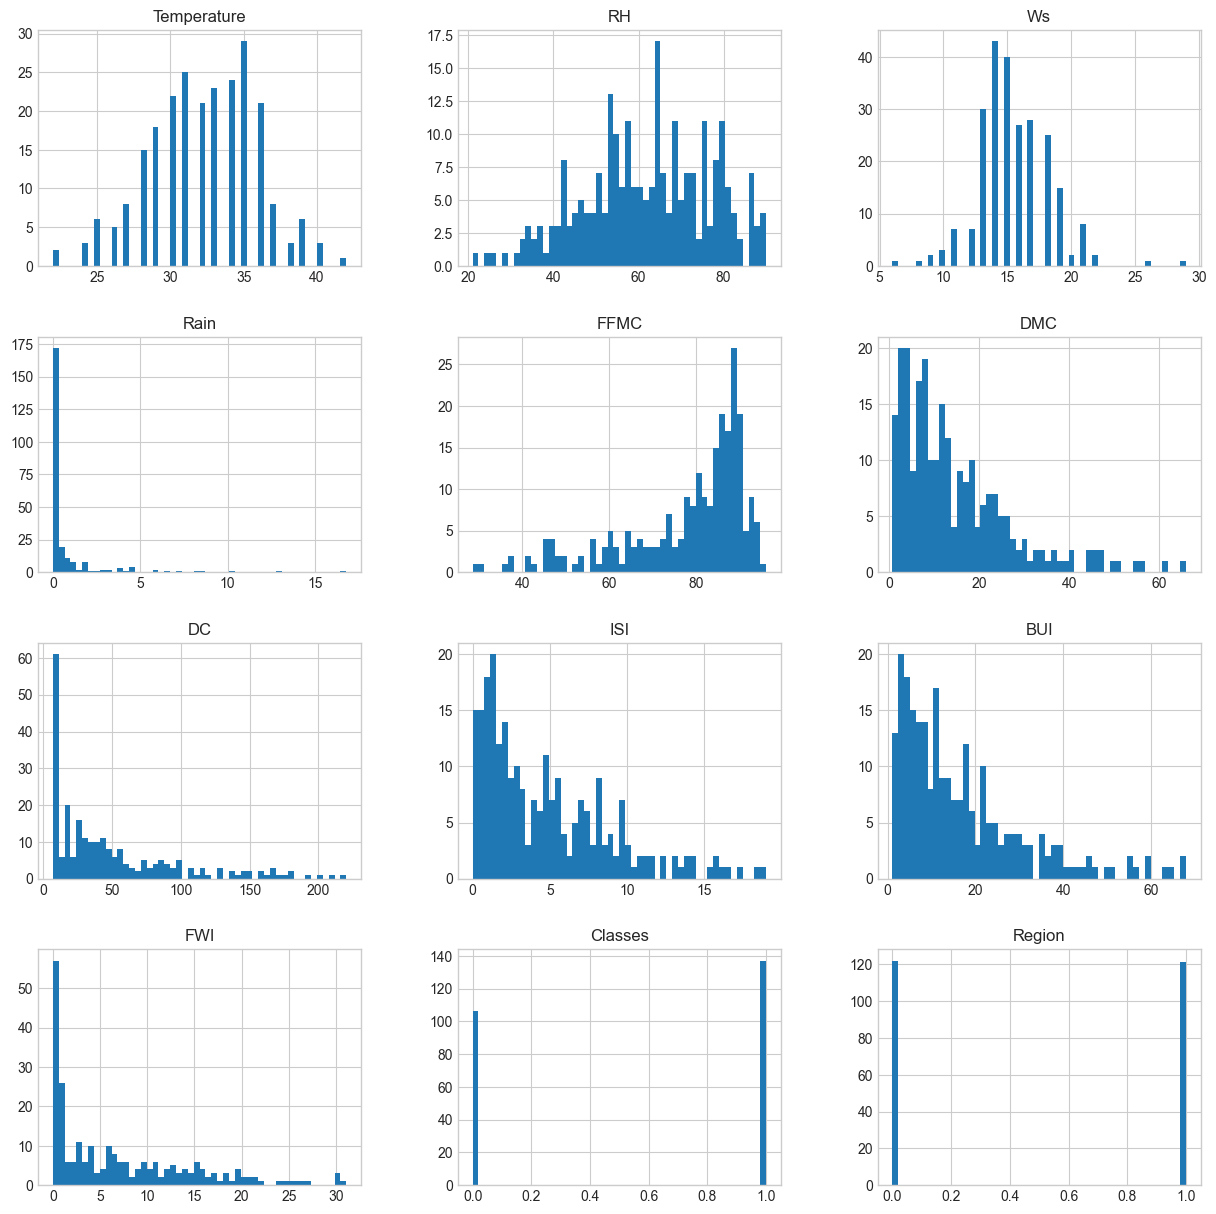

In [54]:
## Plot density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')
df_copy.hist(bins=50, figsize=(15,15))
plt.show()

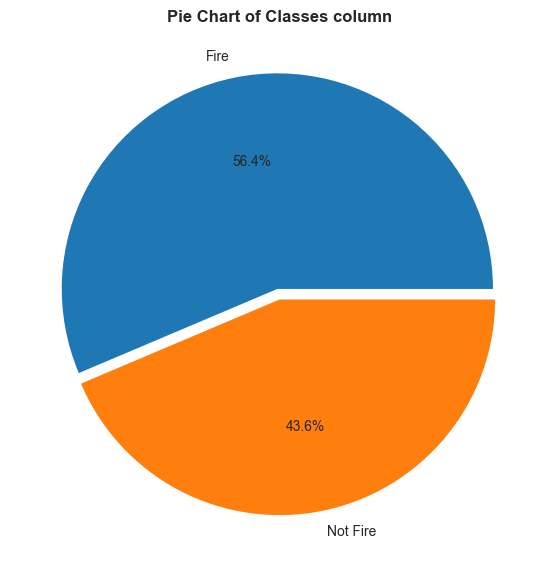

In [55]:
df['Classes'] = df['Classes'].str.strip()

## Percentage for pie chart
percentage = df['Classes'].value_counts(normalize=True)*100
classlabels = ['Fire',"Not Fire"]
plt.figure(figsize=(7,7))
plt.pie(percentage , labels=classlabels, autopct = '%1.1f%%', explode=[0.05,0])
plt.title('Pie Chart of Classes column',weight='bold')
plt.show()

In [56]:
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

In [57]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

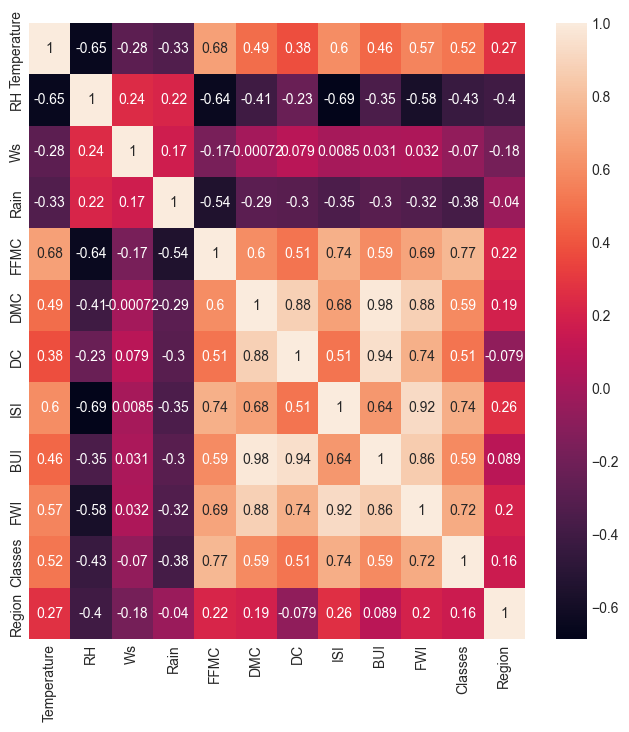

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(df_copy.corr(), annot=True)

<Axes: ylabel='FWI'>

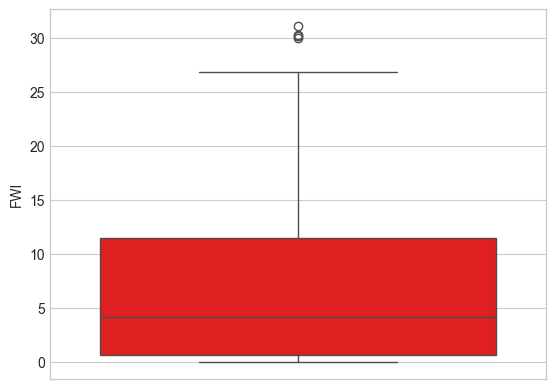

In [59]:
sns.boxplot(df['FWI'], color = 'red')

In [60]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

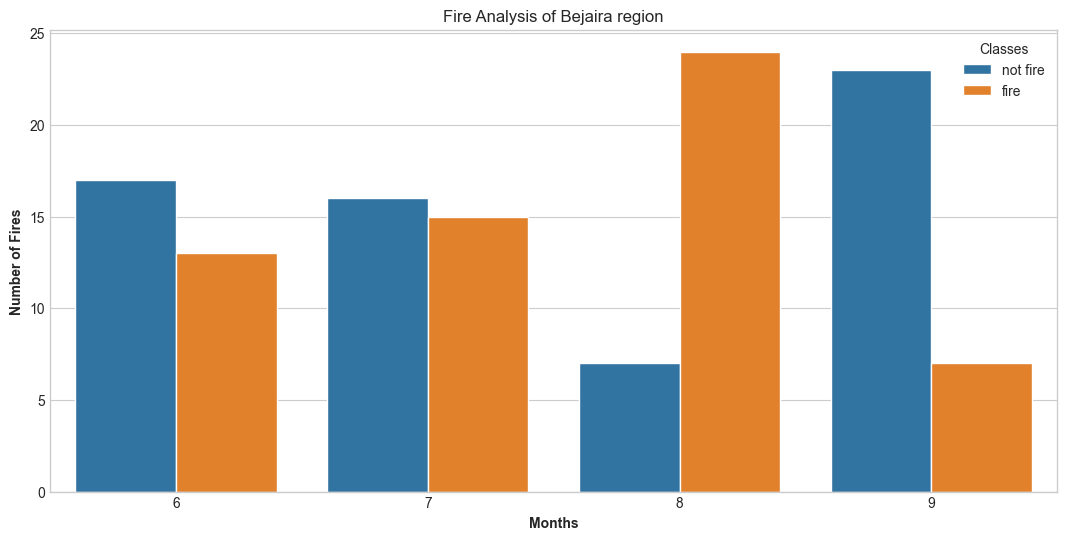

In [61]:
## Monthly fire analysis for Region 0

df_temp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data = df_temp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Bejaira region')
plt.show()

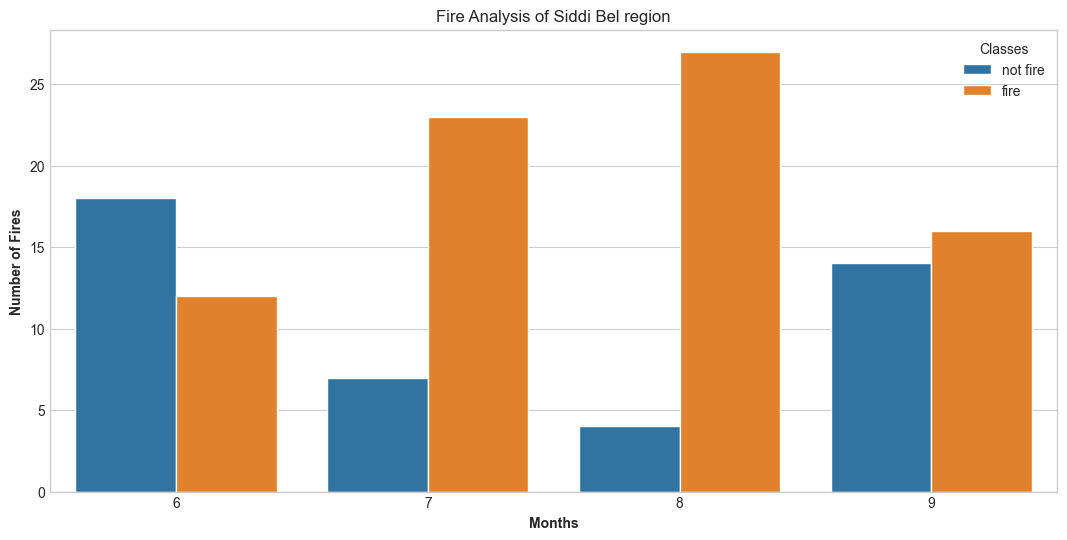

In [62]:
## Monthly fire analysis for Region 1

df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data = df_temp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Siddi Bel region')
plt.show()

In [63]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [64]:
## Dependent and Independent Features

X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']

In [65]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [66]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


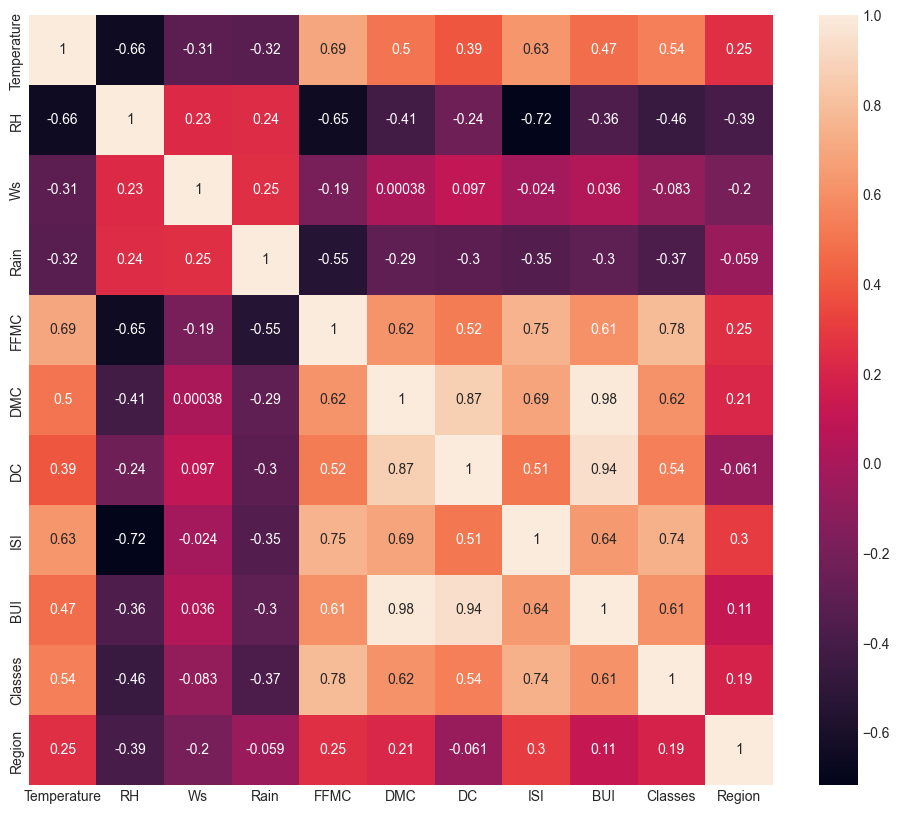

In [67]:
## check for multi collinearity

plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [68]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold/100:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [69]:
corr_features = correlation(X_train , 85)

In [70]:
## Drop Coluns where correlation is greater than 85%

X_train.drop(corr_features, axis = 1, inplace=True)
X_test.drop(corr_features, axis = 1, inplace=True)
X_train.shape , X_test.shape

((182, 9), (61, 9))

In [71]:
## Feature  Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

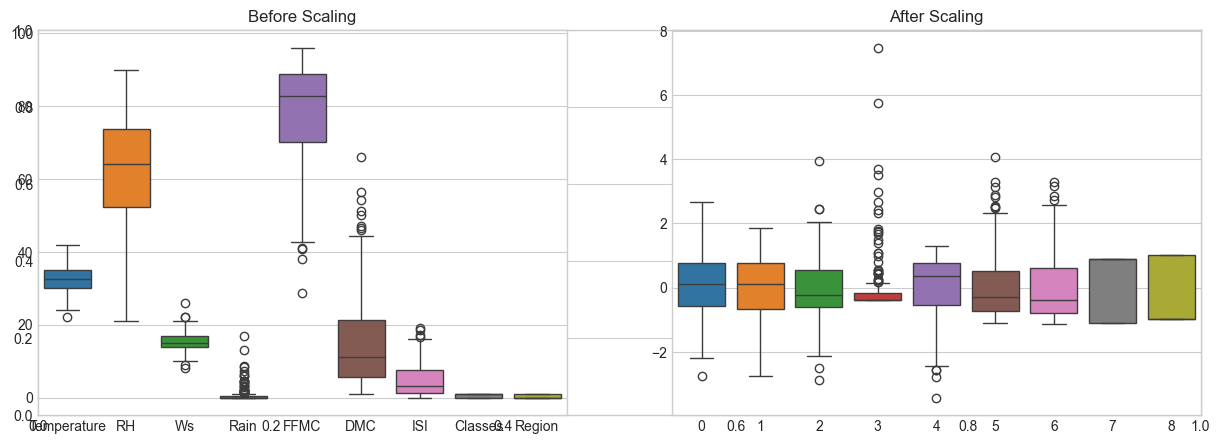

In [73]:
## Box Plots to Understand the effect of Standard Scaler

plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('After Scaling')

plt.show()

In [74]:
## Linear Regression Model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

Mean Absolute Error :  0.5468236465249978
Mean Squared Error :  0.674276687379158
Root Mean Squared Error :  0.8211435242265253
R2 Score : 0.9847657384266951


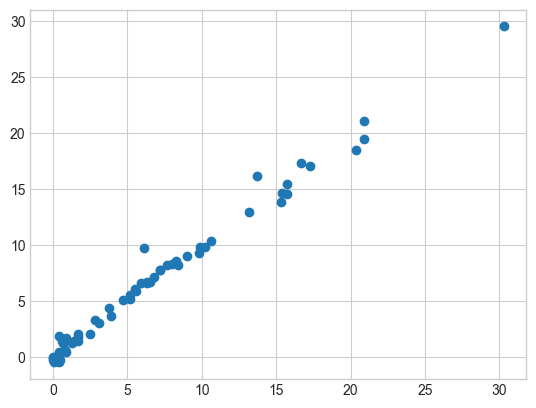

In [75]:
## Performance Metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Mean Absolute Error :  1.133175994914409
Mean Squared Error :  2.2483458918974772
Root Mean Squared Error :  1.4994485292591664
R2 Score : 0.9492020263112388


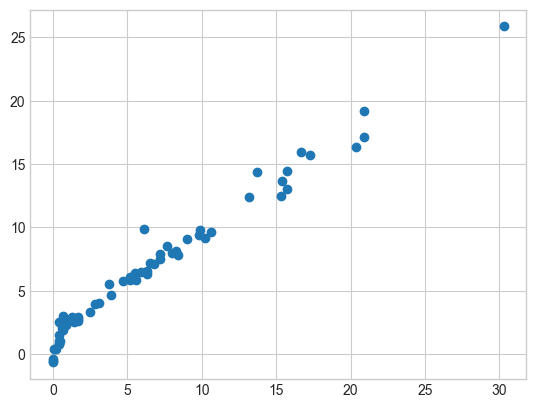

In [76]:
## Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)



In [77]:
## Lasso Cross Validation

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [78]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [79]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [80]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error :  0.619970115826343
Mean Squared Error :  0.792499555474362
Root Mean Squared Error :  0.8902244410677355
R2 Score : 0.9820946715928275


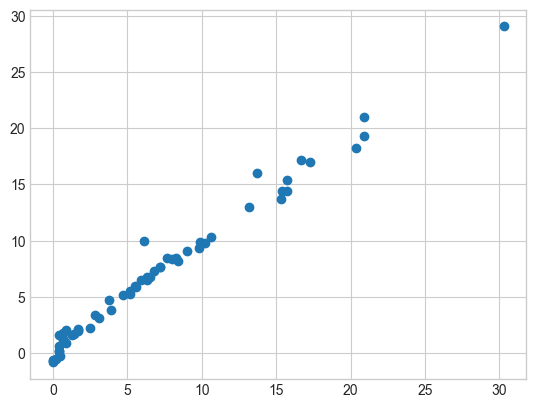

In [81]:
y_pred = lassocv.predict(X_test_scaled)
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)


Mean Absolute Error :  0.5642305340105715
Mean Squared Error :  0.6949198918152096
Root Mean Squared Error :  0.8336185529456561
R2 Score : 0.9842993364555512


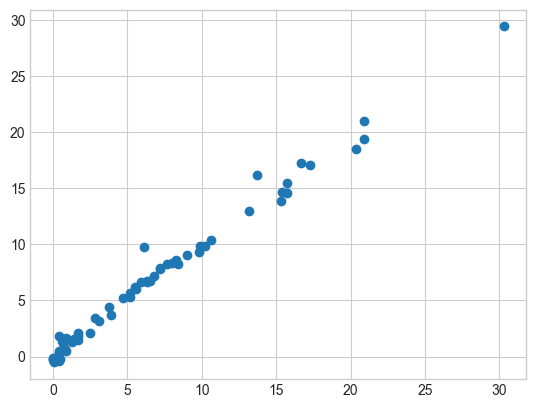

In [82]:
## Ridge

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)



In [83]:
## Ridge Cross Validation

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)


RidgeCV(cv=5)

Mean Absolute Error :  0.5642305340105715
Mean Squared Error :  0.6949198918152096
Root Mean Squared Error :  0.8336185529456561
R2 Score : 0.9842993364555512


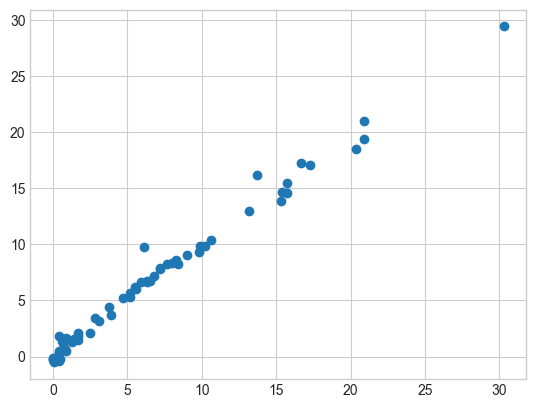

In [84]:
y_pred = ridgecv.predict(X_test_scaled)
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Mean Absolute Error :  1.8822353634896005
Mean Squared Error :  5.5172511010252245
Root Mean Squared Error :  2.3488829474933874
R2 Score : 0.8753460589519703


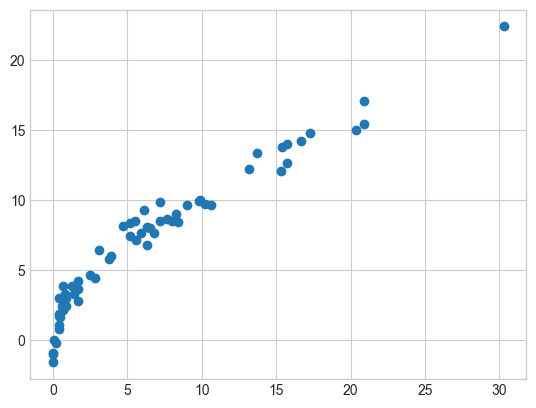

In [85]:
## Elastic Net

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)



In [86]:
## Elastic Net Cross Validation

from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)


ElasticNetCV(cv=5)

Mean Absolute Error :  0.6575946731430898
Mean Squared Error :  0.8222830416276258
Root Mean Squared Error :  0.906798236449336
R2 Score : 0.9814217587854941


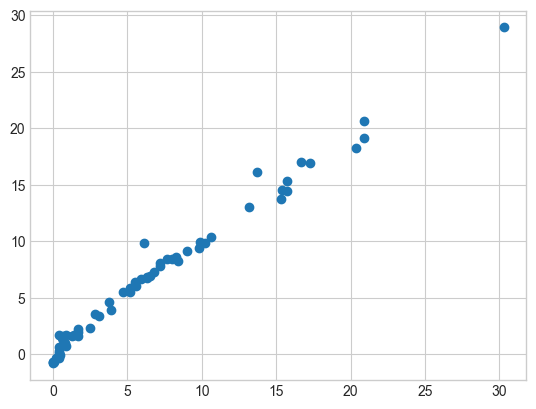

In [87]:
y_pred = elasticcv.predict(X_test_scaled)
print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score :',r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [88]:
## Pickling the ML model , preprocessing model Standard scaler
scaler, ridge

(StandardScaler(), Ridge())

In [89]:
import pickle
pickle.dump(scaler , open('scaler.pkl','wb'))
pickle.dump(ridge , open('ridge.pkl','wb'))